<a href="https://colab.research.google.com/github/alexguecha/Python/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**¿Qué es PANDAS?**
























Vamos a tomar el archivo aprendiendo pandas en 10 min http://pandas.pydata.org/pandas-docs/stable/10min.html, lo vamos a analizar.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##**Estructuras de datos**##

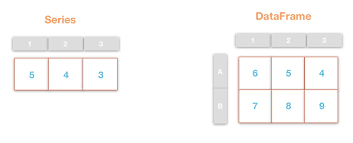


In [ ]:
# Series
#Un array de datos con un identificador.

#Crear una serie
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [ ]:
#creamos una serie con datos de tiempo
dates = pd.date_range('20210101', periods=6)
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
#vamos a realizar un data frame:
#1.Una matriz  con datos aleatorios de 6X4 6-> periodo de fecha 4-> Columnas con la lista de A,B,C,D
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
#df

In [ ]:
#Se raliza la creación de un Dataframe 
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20220102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]), 
                   'F':'foo'})         
df2

,A,B,C,D,E,F
0,1.0,2022-01-02,1.0,3,test,foo
1,1.0,2022-01-02,1.0,3,train,foo
2,1.0,2022-01-02,1.0,3,test,foo
3,1.0,2022-01-02,1.0,3,train,foo


In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

Viewing Data

See the Basics section

See the top & bottom rows of the frame


In [ ]:
df.head()

,A,B,C,D
2021-01-01,1.840091,1.974488,-1.714433,1.425789
2021-01-02,-0.248286,0.298920,-0.502561,-0.348709
2021-01-03,0.528245,-1.010676,-0.037324,-0.099634
2021-01-04,-1.862973,1.132237,1.149239,0.012907
2021-01-05,0.359192,-0.279302,-0.416123,-1.068591


In [ ]:
df.tail(3)

,A,B,C,D
2021-01-04,-1.862973,1.132237,1.149239,0.012907
2021-01-05,0.359192,-0.279302,-0.416123,-1.068591
2021-01-06,0.870762,1.065191,-0.345880,0.137280



Display the index, columns, and the underlying numpy data

In [ ]:
df.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
df.values

array([[-0.98515972, -1.24664362,  1.69203235,  0.25806197],
       [ 1.46088928,  0.49649849,  0.51107827, -0.33891195],
       [ 0.41659695,  0.38622174, -1.3917478 , -0.04157704],
       [-0.21153929,  0.41679333,  0.15994559, -0.77610639],
       [-0.91239376, -1.55541249,  0.14931116,  0.24923193],
       [ 0.28507765, -0.50610828, -0.43690559, -0.08633007]])

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.008912,-0.334775,0.113952,-0.122605
std,0.920467,0.908463,1.021958,0.391128
min,-0.985160,-1.555412,-1.391748,-0.776106
25%,-0.737180,-1.061510,-0.290351,-0.275766
50%,0.036769,-0.059943,0.154628,-0.063954
75%,0.383717,0.409150,0.423295,0.176530
max,1.460889,0.496498,1.692032,0.258062


In [ ]:
df.T

,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06
A,-0.985160,1.460889,0.416597,-0.211539,-0.912394,0.285078
B,-1.246644,0.496498,0.386222,0.416793,-1.555412,-0.506108
C,1.692032,0.511078,-1.391748,0.159946,0.149311,-0.436906
D,0.258062,-0.338912,-0.041577,-0.776106,0.249232,-0.086330


In [ ]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2021-01-01,1.425789,-1.714433,1.974488,1.840091
2021-01-02,-0.348709,-0.502561,0.298920,-0.248286
2021-01-03,-0.099634,-0.037324,-1.010676,0.528245
2021-01-04,0.012907,1.149239,1.132237,-1.862973
2021-01-05,-1.068591,-0.416123,-0.279302,0.359192
2021-01-06,0.137280,-0.345880,1.065191,0.870762


In [ ]:
df.sort_values(by='B')

,A,B,C,D
2021-01-05,-0.912394,-1.555412,0.149311,0.249232
2021-01-01,-0.985160,-1.246644,1.692032,0.258062
2021-01-06,0.285078,-0.506108,-0.436906,-0.086330
2021-01-03,0.416597,0.386222,-1.391748,-0.041577
2021-01-04,-0.211539,0.416793,0.159946,-0.776106
2021-01-02,1.460889,0.496498,0.511078,-0.338912


Note: While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation Indexing and Selecting Data and MultiIndex / Advanced Indexing
Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [ ]:
df['A']

2021-01-01   -0.985160
2021-01-02    1.460889
2021-01-03    0.416597
2021-01-04   -0.211539
2021-01-05   -0.912394
2021-01-06    0.285078
Freq: D, Name: A, dtype: float64

In [ ]:
df[0:3]

,A,B,C,D
2021-01-01,1.840091,1.974488,-1.714433,1.425789
2021-01-02,-0.248286,0.298920,-0.502561,-0.348709
2021-01-03,0.528245,-1.010676,-0.037324,-0.099634


In [ ]:
df['20210102':'20210104']

,A,B,C,D
2021-01-02,-0.248286,0.298920,-0.502561,-0.348709
2021-01-03,0.528245,-1.010676,-0.037324,-0.099634
2021-01-04,-1.862973,1.132237,1.149239,0.012907


In [ ]:
df

,A,B,C,D
2021-01-01,1.840091,1.974488,-1.714433,1.425789
2021-01-02,-0.248286,0.298920,-0.502561,-0.348709
2021-01-03,0.528245,-1.010676,-0.037324,-0.099634
2021-01-04,-1.862973,1.132237,1.149239,0.012907
2021-01-05,0.359192,-0.279302,-0.416123,-1.068591
2021-01-06,0.870762,1.065191,-0.345880,0.137280


In [ ]:
df.loc[dates[0]]

A    1.840091
B    1.974488
C   -1.714433
D    1.425789
Name: 2021-01-01 00:00:00, dtype: float64

In [ ]:
df.loc[:,['A','B']]

,A,B
2021-01-01,-0.985160,-1.246644
2021-01-02,1.460889,0.496498
2021-01-03,0.416597,0.386222
2021-01-04,-0.211539,0.416793
2021-01-05,-0.912394,-1.555412
2021-01-06,0.285078,-0.506108


In [ ]:
df.loc['20210102':'20210104',['A','B']]

,A,B
2021-01-02,1.460889,0.496498
2021-01-03,0.416597,0.386222
2021-01-04,-0.211539,0.416793


In [ ]:
#Reduction in the dimensions of the returned object

df.loc['20210102',['A','B']]


A   -0.248286
B    0.298920
Name: 2021-01-02 00:00:00, dtype: float64

In [ ]:
#For getting a scalar value

df.loc[dates[0],'A']

-0.9851597213615477

In [ ]:
df

,A,B,C,D
2021-01-01,-0.985160,-1.246644,1.692032,0.258062
2021-01-02,1.460889,0.496498,0.511078,-0.338912
2021-01-03,0.416597,0.386222,-1.391748,-0.041577
2021-01-04,-0.211539,0.416793,0.159946,-0.776106
2021-01-05,-0.912394,-1.555412,0.149311,0.249232
2021-01-06,0.285078,-0.506108,-0.436906,-0.086330


In [ ]:
#Selection by Position
#See more in Selection by Position
#Select via the position of the passed integers
df.iloc[3]

A   -0.211539
B    0.416793
C    0.159946
D   -0.776106
Name: 2021-01-04 00:00:00, dtype: float64

In [ ]:
df.iloc[1:5,0:2]

,A,B
2021-01-02,-0.248286,0.298920
2021-01-03,0.528245,-1.010676
2021-01-04,-1.862973,1.132237
2021-01-05,0.359192,-0.279302


In [ ]:
df

,A,B,C,D
2021-01-01,1.840091,1.974488,-1.714433,1.425789
2021-01-02,-0.248286,0.298920,-0.502561,-0.348709
2021-01-03,0.528245,-1.010676,-0.037324,-0.099634
2021-01-04,-1.862973,1.132237,1.149239,0.012907
2021-01-05,0.359192,-0.279302,-0.416123,-1.068591
2021-01-06,0.870762,1.065191,-0.345880,0.137280


In [ ]:
#By lists of integer position locations, similar to the numpy/python style

df.iloc[[1,2,4],[0,2]]


,A,C
2021-01-02,-0.248286,-0.502561
2021-01-03,0.528245,-0.037324
2021-01-05,0.359192,-0.416123


In [ ]:
#For slicing rows explicitly

df.iloc[1:3,:3]


,A,B,C
2021-01-02,-0.248286,0.298920,-0.502561
2021-01-03,0.528245,-1.010676,-0.037324


In [ ]:
#For slicing columns explicitly

df.iloc[:,1:3]


,B,C
2021-01-01,1.974488,-1.714433
2021-01-02,0.298920,-0.502561
2021-01-03,-1.010676,-0.037324
2021-01-04,1.132237,1.149239
2021-01-05,-0.279302,-0.416123
2021-01-06,1.065191,-0.345880


In [ ]:
#For getting a value explicitly

df.iloc[0,1]

-1.246643621135312

In [ ]:
df

,A,B,C,D,F
2021-01-01,0.000000,1.974488,-1.714433,1.425789,NaN
2021-01-02,-0.248286,0.298920,-0.502561,-0.348709,1.0
2021-01-03,0.528245,-1.010676,-0.037324,-0.099634,2.0
2021-01-04,-1.862973,1.132237,1.149239,0.012907,3.0
2021-01-05,0.359192,-0.279302,-0.416123,-1.068591,4.0
2021-01-06,0.870762,1.065191,-0.345880,0.137280,5.0


In [ ]:
#For getting fast access to a scalar (equiv to the prior method)

df.iat[0,1]

-1.246643621135312

In [ ]:
#Boolean Indexing

#Using a single column’s values to select data.

df[df.A > 0]

,A,B,C,D
2021-01-01,1.840091,1.974488,-1.714433,1.425789
2021-01-03,0.528245,-1.010676,-0.037324,-0.099634
2021-01-05,0.359192,-0.279302,-0.416123,-1.068591
2021-01-06,0.870762,1.065191,-0.345880,0.137280


In [ ]:
#A where operation for getting.

df[df > 0]

,A,B,C,D
2021-01-01,1.840091,1.974488,NaN,1.425789
2021-01-02,NaN,0.298920,NaN,NaN
2021-01-03,0.528245,NaN,NaN,NaN
2021-01-04,NaN,1.132237,1.149239,0.012907
2021-01-05,0.359192,NaN,NaN,NaN
2021-01-06,0.870762,1.065191,NaN,0.137280


In [ ]:
#Using the isin() method for filtering:
df2 = df.copy()

In [ ]:
df2['E'] = ['one','one', 'two','three','four','three']
df2

,A,B,C,D,E
2021-01-01,1.840091,1.974488,-1.714433,1.425789,one
2021-01-02,-0.248286,0.298920,-0.502561,-0.348709,one
2021-01-03,0.528245,-1.010676,-0.037324,-0.099634,two
2021-01-04,-1.862973,1.132237,1.149239,0.012907,three
2021-01-05,0.359192,-0.279302,-0.416123,-1.068591,four
2021-01-06,0.870762,1.065191,-0.345880,0.137280,three


In [ ]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2021-01-03,0.528245,-1.010676,-0.037324,-0.099634,two
2021-01-05,0.359192,-0.279302,-0.416123,-1.068591,four


In [ ]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20210102',periods=6))
s1

2021-01-02    1
2021-01-03    2
2021-01-04    3
2021-01-05    4
2021-01-06    5
2021-01-07    6
Freq: D, dtype: int64

In [ ]:
df['F']=s1
df

,A,B,C,D,F
2021-01-01,1.840091,1.974488,-1.714433,1.425789,NaN
2021-01-02,-0.248286,0.298920,-0.502561,-0.348709,1.0
2021-01-03,0.528245,-1.010676,-0.037324,-0.099634,2.0
2021-01-04,-1.862973,1.132237,1.149239,0.012907,3.0
2021-01-05,0.359192,-0.279302,-0.416123,-1.068591,4.0
2021-01-06,0.870762,1.065191,-0.345880,0.137280,5.0


In [ ]:
#Setting values by label
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2021-01-01,0.000000,1.974488,-1.714433,1.425789,NaN
2021-01-02,-0.248286,0.298920,-0.502561,-0.348709,1.0
2021-01-03,0.528245,-1.010676,-0.037324,-0.099634,2.0
2021-01-04,-1.862973,1.132237,1.149239,0.012907,3.0
2021-01-05,0.359192,-0.279302,-0.416123,-1.068591,4.0
2021-01-06,0.870762,1.065191,-0.345880,0.137280,5.0


In [ ]:
#Settomg values by position

df.iat[0,3] = 0
df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,1.692032,0.000000,NaN
2021-01-02,1.460889,0.496498,0.511078,-0.338912,1.0
2021-01-03,0.416597,0.386222,-1.391748,-0.041577,2.0
2021-01-04,-0.211539,0.416793,0.159946,-0.776106,3.0
2021-01-05,-0.912394,-1.555412,0.149311,0.249232,4.0
2021-01-06,0.285078,-0.506108,-0.436906,-0.086330,5.0


In [ ]:
#Setting by assigning with a numpy array

df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,1.692032,5,NaN
2021-01-02,1.460889,0.496498,0.511078,5,1.0
2021-01-03,0.416597,0.386222,-1.391748,5,2.0
2021-01-04,-0.211539,0.416793,0.159946,5,3.0
2021-01-05,-0.912394,-1.555412,0.149311,5,4.0
2021-01-06,0.285078,-0.506108,-0.436906,5,5.0


In [ ]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2021-01-01,0.000000,0.000000,-1.692032,-5,NaN
2021-01-02,-1.460889,-0.496498,-0.511078,-5,-1.0
2021-01-03,-0.416597,-0.386222,-1.391748,-5,-2.0
2021-01-04,-0.211539,-0.416793,-0.159946,-5,-3.0
2021-01-05,-0.912394,-1.555412,-0.149311,-5,-4.0
2021-01-06,-0.285078,-0.506108,-0.436906,-5,-5.0


In [ ]:
df3_copia=df.copy
df3_copia

<bound method NDFrame.copy of                    A         B         C         D    F
2021-01-01  0.000000  1.974488 -1.714433  1.425789  NaN
2021-01-02 -0.248286  0.298920 -0.502561 -0.348709  1.0
2021-01-03  0.528245 -1.010676 -0.037324 -0.099634  2.0
2021-01-04 -1.862973  1.132237  1.149239  0.012907  3.0
2021-01-05  0.359192 -0.279302 -0.416123 -1.068591  4.0
2021-01-06  0.870762  1.065191 -0.345880  0.137280  5.0>

In [ ]:
df3reind = df3_copia.reindex(index=dates[0:4], columns=list(df3_copia.columns) + ['E'])
df3reind.loc[dates[0]:dates[1],'E'] = 1
df3reind

AttributeError: ignored

Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.


In [ ]:
df1

,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,1.692032,5,NaN,1.0
2021-01-02,1.460889,0.496498,0.511078,5,1.0,1.0
2021-01-03,0.416597,0.386222,-1.391748,5,2.0,NaN
2021-01-04,-0.211539,0.416793,0.159946,5,3.0,NaN


In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2021-01-01,0.000000,1.974488,-1.714433,1.425789,NaN,1.0
2021-01-02,-0.248286,0.298920,-0.502561,-0.348709,1.0,1.0
2021-01-03,0.528245,-1.010676,-0.037324,-0.099634,2.0,NaN
2021-01-04,-1.862973,1.132237,1.149239,0.012907,3.0,NaN


In [ ]:
#borra todas las filas que tengan datos faltantes

df1.dropna(how='any')


,A,B,C,D,F,E
2021-01-02,1.460889,0.496498,0.511078,5,1.0,1.0


In [ ]:
#reemplazo los valores nulos

df1.fillna(value=5)

,A,B,C,D,F,E
2021-01-01,0.000000,0.000000,1.692032,5,5.0,1.0
2021-01-02,1.460889,0.496498,0.511078,5,1.0,1.0
2021-01-03,0.416597,0.386222,-1.391748,5,2.0,5.0
2021-01-04,-0.211539,0.416793,0.159946,5,3.0,5.0


In [ ]:
pd.isnull(df1)

,A,B,C,D,F,E
2021-01-01,False,False,False,False,True,False
2021-01-02,False,False,False,False,False,False
2021-01-03,False,False,False,False,False,True
2021-01-04,False,False,False,False,False,True


In [ ]:
df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,1.692032,5,NaN
2021-01-02,1.460889,0.496498,0.511078,5,1.0
2021-01-03,0.416597,0.386222,-1.391748,5,2.0
2021-01-04,-0.211539,0.416793,0.159946,5,3.0
2021-01-05,-0.912394,-1.555412,0.149311,5,4.0
2021-01-06,0.285078,-0.506108,-0.436906,5,5.0


In [ ]:
df.mean()

A    0.173105
B   -0.127001
C    0.113952
D    5.000000
F    3.000000
dtype: float64

In [ ]:
df.mean(1)

2021-01-01    1.673008
2021-01-02    1.693693
2021-01-03    1.282214
2021-01-04    1.673040
2021-01-05    1.336301
2021-01-06    1.868413
Freq: D, dtype: float64

In [ ]:
#Operar con objetos que tienen diferente dimensionalidad y necesitan alineación.
#Además, pandas transmite automáticamente a lo largo de la dimensión especificada.
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2021-01-01    NaN
2021-01-02    NaN
2021-01-03    1.0
2021-01-04    3.0
2021-01-05    5.0
2021-01-06    NaN
Freq: D, dtype: float64

In [ ]:
subs=df.sub(s, axis='index')
subs


,A,B,C,D,F
2021-01-01,NaN,NaN,NaN,NaN,NaN
2021-01-02,NaN,NaN,NaN,NaN,NaN
2021-01-03,-0.471755,-2.010676,-1.037324,-1.099634,1.0
2021-01-04,-4.862973,-1.867763,-1.850761,-2.987093,0.0
2021-01-05,-4.640808,-5.279302,-5.416123,-6.068591,-1.0
2021-01-06,NaN,NaN,NaN,NaN,NaN


In [ ]:
df

,A,B,C,D,F
2021-01-01,0.000000,0.000000,1.692032,5,NaN
2021-01-02,1.460889,0.496498,0.511078,5,1.0
2021-01-03,0.416597,0.386222,-1.391748,5,2.0
2021-01-04,-0.211539,0.416793,0.159946,5,3.0
2021-01-05,-0.912394,-1.555412,0.149311,5,4.0
2021-01-06,0.285078,-0.506108,-0.436906,5,5.0


In [ ]:
#Apply
#Applying functions to the data
df.apply(np.cumsum)

,A,B,C,D,F
2021-01-01,0.000000,1.974488,-1.714433,1.425789,NaN
2021-01-02,-0.248286,2.273408,-2.216994,1.077080,1.0
2021-01-03,0.279960,1.262732,-2.254319,0.977445,3.0
2021-01-04,-1.583013,2.394969,-1.105080,0.990352,6.0
2021-01-05,-1.223821,2.115667,-1.521203,-0.078239,10.0
2021-01-06,-0.353059,3.180858,-1.867083,0.059041,15.0


In [ ]:
df.apply(lambda x: x.max() - x.min())

A    2.373283
B    2.051911
C    3.083780
D    0.000000
F    4.000000
dtype: float64

In [ ]:
#Histogramming

#See more at Histogramming and Discretization

s = pd.Series(np.random.randint(0, 7, size=10))
s
s.value_counts()

1    2
4    2
0    2
3    1
2    1
5    1
6    1
dtype: int64

In [ ]:
#String Methods

#Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

s.str.lower()


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [ ]:
#pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.
#See the Merging section
#Concatenating pandas objects together with concat():
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.326863,-0.179022,-0.499511,1.070460
1,-0.836690,1.263869,1.108241,0.533891
2,0.089221,-0.303725,0.367822,-1.474526
3,-1.852342,0.582019,-0.201482,1.044962
4,-0.666070,0.128753,-1.432079,-1.053979
5,0.580063,-0.202573,0.222400,0.562638
6,0.486490,1.049162,-1.797233,1.303387
7,1.441954,-0.326911,0.799490,0.646839
8,-0.197195,0.592049,1.382727,-0.020998
9,1.252374,0.552602,-1.201078,0.924751


In [ ]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.326863,-0.179022,-0.499511,1.070460
1,-0.836690,1.263869,1.108241,0.533891
2,0.089221,-0.303725,0.367822,-1.474526
3,-1.852342,0.582019,-0.201482,1.044962
4,-0.666070,0.128753,-1.432079,-1.053979
5,0.580063,-0.202573,0.222400,0.562638
6,0.486490,1.049162,-1.797233,1.303387
7,1.441954,-0.326911,0.799490,0.646839
8,-0.197195,0.592049,1.382727,-0.020998
9,1.252374,0.552602,-1.201078,0.924751


In [ ]:
#Join

#SQL style merges. See the Database style joining

left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

left

,key,lval
0,foo,1
1,foo,2


In [ ]:
right

,key,rval
0,foo,4
1,foo,5


In [ ]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [ ]:
#Append
#Append rows to a dataframe. See the Appending

df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-2.088159,0.371139,1.690032,-0.603608
1,-1.595169,2.652052,1.173472,-1.253338
2,-0.870069,1.680268,0.146122,-1.697993
3,-1.440821,0.046798,1.253798,0.433820
4,-2.400817,0.406135,0.260957,2.445023
5,-1.536372,-0.064007,-0.410464,1.337735
6,1.765935,-0.660979,0.836453,-1.040697
7,2.012071,0.362314,-0.493156,-0.937726


In [ ]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,0,1,2,3
0,0.326863,-0.179022,-0.499511,1.070460
1,-0.836690,1.263869,1.108241,0.533891
2,0.089221,-0.303725,0.367822,-1.474526
3,-1.852342,0.582019,-0.201482,1.044962
4,-0.666070,0.128753,-1.432079,-1.053979
5,0.580063,-0.202573,0.222400,0.562638
6,0.486490,1.049162,-1.797233,1.303387
7,1.441954,-0.326911,0.799490,0.646839
8,-0.197195,0.592049,1.382727,-0.020998
9,1.252374,0.552602,-1.201078,0.924751


In [ ]:
#Grouping

#By “group by” we are referring to a process involving one or more of the following steps

 #   Splitting the data into groups based on some criteria
 #   Applying a function to each group independently
 #   Combining the results into a data structure

#See the Grouping section

In [ ]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,-0.457334,0.623513
1,bar,one,-1.069601,2.085613
2,foo,two,-0.535115,-1.063538
3,bar,three,-0.658270,-0.702993
4,foo,two,-0.176499,-1.331094
5,bar,two,0.457209,0.626937
6,foo,one,-0.169828,1.059968
7,foo,three,0.004252,0.661691


In [ ]:
#Grouping and then applying a function sum to the resulting groups.

df.groupby('A').sum()

,C,D
A,,
bar,-1.270662,2.009557
foo,-1.334523,-0.049459


In [ ]:
s=df.groupby('A').sum()
s1=df.groupby('A').sum()


In [ ]:
type(s1)

pandas.core.frame.DataFrame

In [ ]:
from pickle import TRUE
s1.reset_index()

,A,C,D
0,bar,-1.270662,2.009557
1,foo,-1.334523,-0.049459


In [ ]:
s.reset_index()

,A,C,D
0,bar,-1.270662,2.009557
1,foo,-1.334523,-0.049459


In [ ]:
s.index.name='A'
s

,C,D
A,,
bar,-1.270662,2.009557
foo,-1.334523,-0.049459


In [ ]:
type(s)

pandas.core.frame.DataFrame

In [ ]:
s.index

Index(['bar', 'foo'], dtype='object', name='A')

In [ ]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.069601  2.085613
    three -0.658270 -0.702993
    two    0.457209  0.626937
foo one   -0.627162  1.683482
    three  0.004252  0.661691
    two   -0.711614 -2.394632

In [ ]:
#Reshaping

#See the sections on Hierarchical Indexing and Reshaping.
#Stack

tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df2 = df[:4]

df2

A         B
first second                    
bar   one     0.009225  0.041859
      two     1.945334  0.990820
baz   one     1.154468  0.306350
      two    -0.014892  0.115828

In [ ]:
#The stack() method “compresses” a level in the DataFrame’s columns.
stacked = df2.stack()
stacked


first  second   
bar    one     A    0.009225
               B    0.041859
       two     A    1.945334
               B    0.990820
baz    one     A    1.154468
               B    0.306350
       two     A   -0.014892
               B    0.115828
dtype: float64

In [ ]:
#With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:
#stacked.unstack()
stacked.unstack(1)

second        one       two
first                      
bar   A  0.009225  1.945334
      B  0.041859  0.990820
baz   A  1.154468 -0.014892
      B  0.306350  0.115828

In [ ]:
#See the section on Pivot Tables.

df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

df

,A,B,C,D,E
0,one,A,foo,0.091210,0.865473
1,one,B,foo,-1.486780,0.623556
2,two,C,foo,0.819490,-1.360989
3,three,A,bar,0.476232,1.427861
4,one,B,bar,0.704031,-0.410996
5,one,C,bar,0.309625,-1.690269
6,two,A,foo,0.285820,-1.331449
7,three,B,foo,0.688042,0.060843
8,one,C,foo,-0.566347,-0.642044
9,one,A,bar,0.412687,-0.288825


In [ ]:
#We can produce pivot tables from this data very easily:

pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])


C             bar       foo
A     B                    
one   A  0.412687  0.091210
      B  0.704031 -1.486780
      C  0.309625 -0.566347
three A  0.476232       NaN
      B       NaN  0.688042
      C -1.871633       NaN
two   A       NaN  0.285820
      B -0.750026       NaN
      C       NaN  0.819490

In [ ]:
#Time Series

#pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section

rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()
ts

2012-01-01 00:00:00    356
2012-01-01 00:00:01    216
2012-01-01 00:00:02    115
2012-01-01 00:00:03    202
2012-01-01 00:00:04    279
                      ... 
2012-01-01 00:01:35     61
2012-01-01 00:01:36     43
2012-01-01 00:01:37    360
2012-01-01 00:01:38    375
2012-01-01 00:01:39    188
Freq: S, Length: 100, dtype: int64

In [ ]:
#Time zone representation
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts


2012-03-06   -0.103665
2012-03-07    1.303620
2012-03-08    1.069876
2012-03-09   -0.406883
2012-03-10   -0.546666
Freq: D, dtype: float64

In [ ]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.103665
2012-03-07 00:00:00+00:00    1.303620
2012-03-08 00:00:00+00:00    1.069876
2012-03-09 00:00:00+00:00   -0.406883
2012-03-10 00:00:00+00:00   -0.546666
Freq: D, dtype: float64

In [ ]:
#Convert to another time zone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.103665
2012-03-06 19:00:00-05:00    1.303620
2012-03-07 19:00:00-05:00    1.069876
2012-03-08 19:00:00-05:00   -0.406883
2012-03-09 19:00:00-05:00   -0.546666
Freq: D, dtype: float64

In [ ]:
#Converting between time span representations
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.355087
2012-02-29   -1.779341
2012-03-31   -0.340956
2012-04-30   -0.653999
2012-05-31   -0.628288
Freq: M, dtype: float64

In [ ]:
ps = ts.to_period()
ps



2012-01   -0.355087
2012-02   -1.779341
2012-03   -0.340956
2012-04   -0.653999
2012-05   -0.628288
Freq: M, dtype: float64

In [ ]:
ps.to_timestamp()

In [ ]:
#Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.445766
1990-06-01 09:00    1.341202
1990-09-01 09:00   -0.238693
1990-12-01 09:00   -1.987163
1991-03-01 09:00   -0.984178
Freq: H, dtype: float64

In [ ]:
#Categoricals
#Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [ ]:
#Convert the raw grades to a categorical data type.
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [ ]:
#Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [ ]:
#Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [ ]:
#Sorting is per order in the categories, not lexical order.

df.sort_values(by="grade")

In [ ]:
#Grouping by a categorical column shows also empty categories.

df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

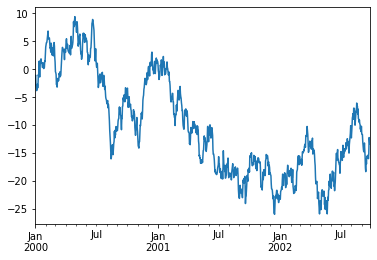

In [ ]:
#Plotting
#Plotting docs.
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

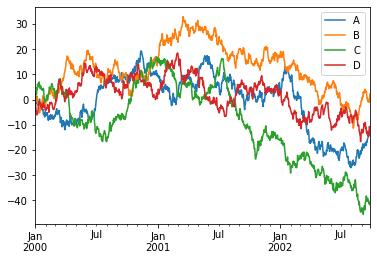

In [ ]:
#On DataFrame, plot() is a convenience to plot all of the columns with labels:

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

df = df.cumsum()

plt.figure(); df.plot(); plt.legend(loc='best')

In [ ]:
#Getting Data In/Out
#CSV

#Writing to a csv file

df.to_csv('foo.csv')

#Reading from a csv file

pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.805877,0.703996,-0.481785,-2.269630
1,2000-01-02,-0.328110,0.244593,0.286366,-1.645837
2,2000-01-03,-0.123928,-0.778879,2.043943,-3.590909
3,2000-01-04,-1.511986,-0.513363,2.826940,-4.452078
4,2000-01-05,-1.328509,-0.016655,2.213347,-5.161176
...,...,...,...,...,...
995,2002-09-22,-13.678767,0.006048,-40.122777,-14.602237
996,2002-09-23,-13.466194,-1.090380,-41.386938,-13.071204
997,2002-09-24,-13.838306,-0.559663,-40.754230,-10.721256
998,2002-09-25,-12.528554,0.643539,-41.339985,-11.064680


In [ ]:
#Reading and writing to HDFStores
#Writing to a HDF5 Store

df.to_hdf('foo.h5','df')

#Reading from a HDF5 Store

pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-0.805877,0.703996,-0.481785,-2.269630
2000-01-02,-0.328110,0.244593,0.286366,-1.645837
2000-01-03,-0.123928,-0.778879,2.043943,-3.590909
2000-01-04,-1.511986,-0.513363,2.826940,-4.452078
2000-01-05,-1.328509,-0.016655,2.213347,-5.161176
...,...,...,...,...
2002-09-22,-13.678767,0.006048,-40.122777,-14.602237
2002-09-23,-13.466194,-1.090380,-41.386938,-13.071204
2002-09-24,-13.838306,-0.559663,-40.754230,-10.721256
2002-09-25,-12.528554,0.643539,-41.339985,-11.064680


In [ ]:
#Reading and writing to MS Excel
#Writing to an excel file

df.to_excel('foo.xlsx', sheet_name='Sheet1')
#Reading from an excel file
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.805877,0.703996,-0.481785,-2.269630
1,2000-01-02,-0.328110,0.244593,0.286366,-1.645837
2,2000-01-03,-0.123928,-0.778879,2.043943,-3.590909
3,2000-01-04,-1.511986,-0.513363,2.826940,-4.452078
4,2000-01-05,-1.328509,-0.016655,2.213347,-5.161176
...,...,...,...,...,...
995,2002-09-22,-13.678767,0.006048,-40.122777,-14.602237
996,2002-09-23,-13.466194,-1.090380,-41.386938,-13.071204
997,2002-09-24,-13.838306,-0.559663,-40.754230,-10.721256
998,2002-09-25,-12.528554,0.643539,-41.339985,-11.064680
